<span style="font-size: 220%;color:#1155cc"> Pytorch: EMBEDDING #1 MS Tytanic  30.03.2021
    
<span style="font-size: 180%;color:red"> 30.03.2021     

Classification Example using a neural network with embedding

In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Tue Mar 30 09:07:09 2021


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### I import data

In [3]:
import pandas as pd

df = pd.read_csv('/media/wojciech/D6DE33C1DE3399271/1A/kaggletrain.csv')
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.shape

(891, 13)

<span style="font-size: 150%;background:#ffd966; color:#45818e"> Sprawdzam, czy nie powinno się zrobić oversampling
    
    populacja jest wzglednie wyrównana

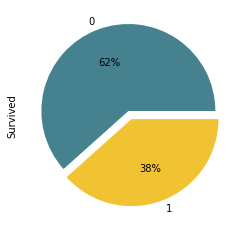

In [5]:
df.Survived.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#45818e', '#f1c232'], explode=(0.05, 0.05))

### I check data completeness and delete records with empty NaN values
<span style="font-size: 150%;background:#ffd966; color:#45818e"> Sprawdzam, kompletność danych

In [6]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation of variables:  (891, 13)


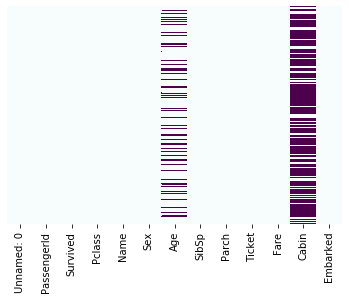

In [7]:
import seaborn as sns

print('Observation of variables: ',df.shape)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

### I delete several columns and empty records in Age columns

In [8]:
del df['Cabin']
del df['Ticket']
del df['Name']
del df['Unnamed: 0']

In [9]:
df=df.dropna(how='any')

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Observation of variables:  (712, 9)


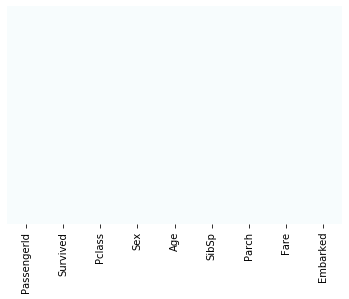

In [70]:
import seaborn as sns

print('Observation of variables: ',df.shape)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

### Arrangement of columns with categorical and continuous data
<span style="font-size: 150%;background:#ffd966; color:#45818e"> Dziele dane na zmienne ciągłe i dyskretne

In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [72]:
df.describe(include=["object"]).columns

ValueError: No objects to concatenate

In [13]:
df.describe(include=[np.number]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:

categorical_columns = ['Sex', 'Embarked']
numerical_columns = ['PassengerId', 'Age', 'SibSp','Parch', 'Fare','Pclass']

In [15]:
df['Parch'].value_counts()

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### We determine that the output variable is the 'Stroke' column

In [16]:
outputs = ['Survived']

### Digitization of text variables

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

We need to convert types for qualitative columns to category. We can do this using the astype () function, as shown below:

## <span style="color:red">Introducing a new data type: 'category'</span>

In [18]:
for category in categorical_columns:
    df[category] = df[category].astype('category')

In [19]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [20]:
df['Sex'].cat.categories

Index(['female', 'male'], dtype='object')

In [21]:
df['Embarked'].cat.categories

Index(['C', 'Q', 'S'], dtype='object')

### Digitization of data

In [22]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

### Why did we digitize data in the format?

The basic purpose of separating categorical columns from numeric columns is that the values in the numeric column can be directly input into neural networks. However, categorized column values must first be converted to numeric types.

In [23]:
categorical_columns

['Sex', 'Embarked']

### Conversion of categorical variables to Numpy matrix

In [24]:
p1 = df['Sex'].cat.codes.values
p2 = df['Embarked'].cat.codes.values


NumP_matrix = np.stack([p1, p2], 1)

NumP_matrix[:10]


array([[1, 2],
       [0, 0],
       [0, 2],
       [0, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [0, 2],
       [0, 0],
       [0, 2]], dtype=int8)

### Odpalam karte graficzną GPU

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Creating a Pytorch tensor from the Numpy matrix

In [26]:
categorical_data = torch.tensor(NumP_matrix, dtype=torch.int64, device=device)
categorical_data[:10]

tensor([[1, 2],
        [0, 0],
        [0, 2],
        [0, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [0, 2],
        [0, 0],
        [0, 2]], device='cuda:0')

### Conversion of DataFrame numeric columns to a Pytorch tensor

In [27]:
numerical_data = np.stack([df[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float, device=device)
numerical_data[:5]

tensor([[ 1.0000, 22.0000,  1.0000,  0.0000,  7.2500,  3.0000],
        [ 2.0000, 38.0000,  1.0000,  0.0000, 71.2833,  1.0000],
        [ 3.0000, 26.0000,  0.0000,  0.0000,  7.9250,  3.0000],
        [ 4.0000, 35.0000,  1.0000,  0.0000, 53.1000,  1.0000],
        [ 5.0000, 35.0000,  0.0000,  0.0000,  8.0500,  3.0000]],
       device='cuda:0')

### Convert result variables to the Pytorch tensor

In [28]:
outputs = torch.tensor(df[outputs].values).flatten()
outputs = torch.tensor(outputs, device=device)
outputs[:5]

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor([0, 1, 1, 1, 0], device='cuda:0')

### Let's sum up the tensors

In [29]:
print('categorical_data: ',categorical_data.shape)
print('numerical_data:   ',numerical_data.shape)
print('outputs:          ',outputs.shape)

categorical_data:  torch.Size([712, 2])
numerical_data:    torch.Size([712, 6])
outputs:           torch.Size([712])


## <span style="color:red">settlement</span>
Przekształciliśmy nasze kolumny kategorialne na liczbowe, w których unikalną wartość reprezentuje jedna liczba całkowita (cyfryzacja - np. Palacz to 1). Na podstawie takiej kolumny (zmiennej) możemy trenować model, ale jest lepszy sposób ...

Lepszym sposobem jest przedstawienie wartości w kolumnie jakościowej jako N-wymiarowego wektora zamiast pojedynczej liczby całkowitej. Ten proces nazywa się osadzaniem. Wektor jest w stanie uchwycić więcej informacji i może znaleźć relacje między różnymi wartościami kategorialnymi w bardziej odpowiedni sposób. Dlatego będziemy przedstawiać wartości w kolumnach kategorialnych w postaci wektorów N-wymiarowych.

Musimy zdefiniować rozmiar osadzania (wymiary wektora) dla wszystkich kolumn jakościowych. Nie ma sztywnej zasady dotyczącej liczby wymiarów. Dobrą zasadą definiowania rozmiaru osadzania dla kolumny jest podzielenie liczby unikalnych wartości w kolumnie przez 2 (ale nie więcej niż 50).

Poniższy skrypt tworzy krotkę zawierającą liczbę unikalnych wartości i rozmiary wymiarów dla wszystkich kolumn jakościowych (dyskretnych).

Zasada jest prosta: matryca osadzająca musi zawsze znajdować się w liczbie wierszy większej niż zakres zmiennych w liczbie wierszy: dlatego dodałem col_size + 2, to duży zapas.

In [30]:
categorical_column_sizes = [len(df[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size+2, min(50, (col_size+5)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 3), (5, 4)]


### Dzielenie zestawu na szkoleniowy i testowy

In [31]:
total_records = df['Age'].count()
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

Aby sprawdzić, czy poprawnie podzieliliśmy dane na zestawy treningów i testów, wydrukujmy długości rekordów szkolenia i testów:

In [32]:
print('categorical_train_data: ',categorical_train_data.shape)
print('numerical_train_data:   ',numerical_train_data.shape)
print('train_outputs:          ', train_outputs.shape)
print('----------------------------------------------------')
print('categorical_test_data:  ',categorical_test_data.shape)
print('numerical_test_data:    ',numerical_test_data.shape)
print('test_outputs:           ',test_outputs.shape)

categorical_train_data:  torch.Size([570, 2])
numerical_train_data:    torch.Size([570, 6])
train_outputs:           torch.Size([570])
----------------------------------------------------
categorical_test_data:   torch.Size([142, 2])
numerical_test_data:     torch.Size([142, 6])
test_outputs:            torch.Size([142])


### Sprawdzam czy wszędzie są CUDA

In [33]:
categorical_train_data[:1]

tensor([[1, 2]], device='cuda:0')

In [34]:
numerical_train_data[:1]

tensor([[ 1.0000, 22.0000,  1.0000,  0.0000,  7.2500,  3.0000]],
       device='cuda:0')

In [35]:
train_outputs[:1]

tensor([0], device='cuda:0')

In [36]:
categorical_test_data[:1]

tensor([[1, 2]], device='cuda:0')

In [37]:
numerical_test_data[:1]

tensor([[720.0000,  33.0000,   0.0000,   0.0000,   7.7750,   3.0000]],
       device='cuda:0')

In [38]:
test_outputs[:1]

tensor([0], device='cuda:0')

<span style="font-size: 130%;color:#1155cc"> Model sieci neuronwej (rozbudowany)

In [39]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

In [40]:
print('categorical_embedding_sizes:  ',categorical_embedding_sizes)
print(numerical_data.shape[1])

categorical_embedding_sizes:   [(4, 3), (5, 4)]
6


## Deklaruje model jako CUDA

In [41]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 2, [200,100,50], p=0.4).to(device)

In [42]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(5, 4)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)


<span style="font-size: 130%;color:#1155cc"> Funkcja straty

In [43]:
#loss_function = torch.nn.MSELoss(reduction='sum')
loss_function = nn.CrossEntropyLoss()
#loss_function = nn.BCEWithLogitsLoss()

<span style="font-size: 130%;color:#1155cc"> Optymalizer

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#optimizer = torch.optim.Rprop(model.parameters(), lr=0.001, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

In [45]:
print('categorical_embedding_sizes:  ',categorical_embedding_sizes)
print(numerical_data.shape[1])
print('categorical_train_data: ',categorical_train_data.shape)
print('numerical_train_data:   ',numerical_train_data.shape)
print('outputs:                ',train_outputs.shape)

categorical_embedding_sizes:   [(4, 3), (5, 4)]
6
categorical_train_data:  torch.Size([570, 2])
numerical_train_data:    torch.Size([570, 6])
outputs:                 torch.Size([570])


In [46]:
y_pred = model(categorical_train_data, numerical_train_data)

In [47]:
epochs = 4600
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%50 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.77691329
epoch:  51 loss: 0.40901139
epoch: 101 loss: 0.37357789
epoch: 151 loss: 0.36450920
epoch: 201 loss: 0.34253812
epoch: 251 loss: 0.28686565
epoch: 301 loss: 0.30878958
epoch: 351 loss: 0.27799082
epoch: 401 loss: 0.27552181
epoch: 451 loss: 0.26976144
epoch: 501 loss: 0.24991062
epoch: 551 loss: 0.27872777
epoch: 601 loss: 0.27810130
epoch: 651 loss: 0.23665135
epoch: 701 loss: 0.20129566
epoch: 751 loss: 0.18521599
epoch: 801 loss: 0.23386508
epoch: 851 loss: 0.23819205
epoch: 901 loss: 0.22326073
epoch: 951 loss: 0.20185594
epoch: 1001 loss: 0.19006044
epoch: 1051 loss: 0.20746766
epoch: 1101 loss: 0.19053723
epoch: 1151 loss: 0.19462201
epoch: 1201 loss: 0.16925281
epoch: 1251 loss: 0.21631435
epoch: 1301 loss: 0.19672358
epoch: 1351 loss: 0.16503435
epoch: 1401 loss: 0.19334954
epoch: 1451 loss: 0.16490082
epoch: 1501 loss: 0.15270953
epoch: 1551 loss: 0.15392178
epoch: 1601 loss: 0.17247018
epoch: 1651 loss: 0.17065556
epoch: 1701 loss: 0.17004418
epoch

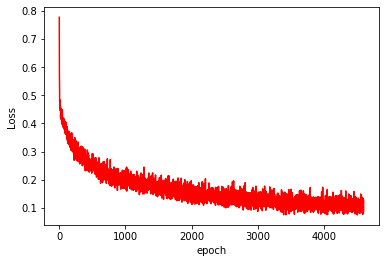

In [48]:
plt.plot(range(epochs), aggregated_losses, color='r')
plt.ylabel('Loss')
plt.xlabel('epoch');

### Forecast based on the model

In [49]:
with torch.no_grad():
    y_val_train = model(categorical_train_data, numerical_train_data)
    loss = loss_function( y_val_train, train_outputs)
print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.12248687


In [50]:
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 1.61603427


NIE POWINNO SIĘ PORÓWNYWAĆ y_val (wynik modelu), KTÓRY MA format ZMIENNYCH FLOAD do test_outputs który ma format zero-jedynkowy. 

Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierała 2 neurony, każda prognoza będzie zawierała 2 wartości. Na przykład pierwsze 5 przewidywanych wartości to:

In [51]:
print(test_outputs[:5])

tensor([0, 1, 0, 0, 0], device='cuda:0')


In [52]:
print(y_val[:5])

tensor([[-1.5058,  1.3570],
        [-0.9131,  0.8410],
        [ 5.7056, -5.9713],
        [-3.3603,  3.3465],
        [ 1.0985, -1.2123]], device='cuda:0')


### ZMIANA FORMATU WYNIKÓW Z FORMATU FLOAT NA FORMAT BINARNY

Celem takich prognoz jest to, że jeśli faktyczny wynik wynosi 0, wartość wskaźnika 0 powinna być wyższa niż wartość wskaźnika 1 i odwrotnie. Możemy uzyskać największy indeks wartości z listy za pomocą następującego skryptu:

<span style="font-size: 180%;color:#1155cc"> Najpier kopiuje tensor y_val z CUDA do CPU

In [53]:
y_val[:1]

tensor([[-1.5058,  1.3570]], device='cuda:0')

In [54]:
y_val = y_val.cpu().data.numpy()

In [55]:
y_val = np.argmax(y_val, axis=1)

Powyższe równanie zwraca maksymalne wskaźniki wartości wzdłuż osi.

In [56]:
print(y_val[:20])

[1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0]


Ponieważ na liście pierwotnie przewidywanych wyników dla pierwszych pięciu rekordów wartości indeksów zerowych są większe niż wartości w pierwszych indeksach, możemy zobaczyć 0 w pierwszych pięciu wierszach przetworzonych danych wyjściowych.

<span style="font-size: 180%;color:#1155cc"> Kopiujemy tensor 'test_outputs' z CUDA do CPU

In [57]:
test_outputs = test_outputs.cpu().data.numpy()

<span style="font-size: 180%;color:#1155cc"> Sprawdzamy jaki jest poziom klasyfikacji modelu

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print('accuracy_score:',accuracy_score(test_outputs, y_val))

[[69 18]
 [15 40]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        87
           1       0.69      0.73      0.71        55

    accuracy                           0.77       142
   macro avg       0.76      0.76      0.76       142
weighted avg       0.77      0.77      0.77       142

accuracy_score: 0.7676056338028169


<span style="font-size: 150%;background:#ffd966">We save the whole model</span>  

In [59]:
torch.save(model,'/home/wojciech/Pulpit/3/byk2.pb')

/home/wojciech/anaconda3/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


<span style="font-size: 150%;background:#ffd966"> We play the whole model

In [60]:
KOT = torch.load('/home/wojciech/Pulpit/3/byk2.pb')
KOT.eval()

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(5, 4)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)

<span style="font-size: 190%;background:#d9ead3"> Podstawiając inne zmienne niezależne, można uzyskać wektor zmiennych wyjściowych

Bierzemy co 5 wartość z wyminiononych zmiennych - to będą nasze zmienne do podstawienia.

In [61]:
A = categorical_train_data[::5]
A[:4]

tensor([[1, 2],
        [1, 2],
        [0, 2],
        [1, 1]], device='cuda:0')

In [62]:
B = numerical_train_data[::5]
B[:4]

tensor([[ 1.0000, 22.0000,  1.0000,  0.0000,  7.2500,  3.0000],
        [ 7.0000, 54.0000,  0.0000,  0.0000, 51.8625,  1.0000],
        [12.0000, 58.0000,  0.0000,  0.0000, 26.5500,  1.0000],
        [17.0000,  2.0000,  4.0000,  1.0000, 29.1250,  3.0000]],
       device='cuda:0')

In [63]:
y =train_outputs[::5]

<span style="font-size: 190%;background:#d9ead3"> Teraz podstawiamy te wartości do wybanego modelu KOT
    
    wynik modelu to y_pred_AB

In [64]:
y_pred_AB = KOT(A, B)
y_pred_AB[:10]

tensor([[  3.7524,  -3.6346],
        [  3.9157,  -4.1045],
        [ -5.7573,   5.2272],
        [ 11.5195, -12.5451],
        [ -2.9299,   2.5873],
        [  6.3082,  -6.4723],
        [ -3.4821,   3.2166],
        [  2.1657,  -1.9199],
        [  5.7714,  -5.7805],
        [  3.0145,  -2.4490]], device='cuda:0', grad_fn=<SliceBackward>)

In [65]:
with torch.no_grad():
    y_val_AB = KOT(A,B)
    loss = loss_function( y_val_AB, y)
print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.05981354


przerabiamy z CUDA na CPU

In [66]:
y_val_AB = y_val_AB.cpu().data.numpy()
y = y.cpu().data.numpy()

In [67]:
y_val_AB = np.argmax(y_val_AB, axis=1)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y,y_val_AB))
print(classification_report(y,y_val_AB))
print(accuracy_score(y, y_val_AB))

[[67  0]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

0.9912280701754386


In [69]:
print('Measuring the time to complete this task:')
print((time.time() - start_time)/60) ## koniec pomiaru czasu

Measuring the time to complete this task:
0.36259980996449787
